<font color = green >

## Home Task: Implement K-means algorithm

</font>

<font color = green >

###  Steps of implementatiion

</font>

1) Initialize $K$ centroids 

2) Assign every point to closest centroid 

3) Compute new centroids as means of samples assigned to corresponding centroid

4) Implement cost $J = \frac{1}{m}\underset{i}{\sum}(d^{(i)})^{2}$ where $d^{(i)}$ is distance from sample $x^{(i)}$ to assigned centroid $c^{(i)}$

5) Iterate setps 2,3 till cost is stabile 

6) Select the best clustering (with the least cost) from 100 results computed with random centroid  initializations 

7) Visualize results (clusters, centroids) for $K=4$

Note: 
* You may  need develop couple of additional/intermediate functions
* You may track cost changes to make sure the algorithm is working properly 

<font color = green >

###  Data 

</font>



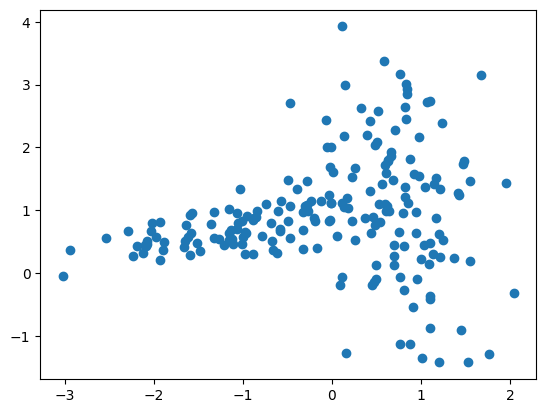

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
Xc_2,_= make_classification(n_samples=200,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    random_state=0,
                                    n_clusters_per_class=1,
                                    class_sep = 0.8)
plt.figure()
plt.scatter  (Xc_2[:,0], Xc_2[:,1])

# Solution
<hr/>

In [10]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin

In [11]:
def dist(x, y):
    dist = []
    for i in range(len(x)):
        dist.append(np.sqrt((y[0][0] - x[i][0]) ** 2 + (y[0][1] - x[i][1]) ** 2))

    return dist

In [12]:
def J(centers, labels, X):
    distances = []
    for i in set(labels):
        samples_i = X[np.where(labels == i)]
        dist_i = np.sum(np.power(dist(samples_i, centers[i].reshape(1, -1)), 2))
        distances.append(dist_i)

    m = len(labels)
    return 1/m*(np.sum(distances))

In [13]:
class k_means_classification():
    def __init__(self, X, n_clusters, random_state = None, cost_visualization=False, verbose=False):
        self.X = X
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.cost_visualization = cost_visualization
        self.verbose = verbose
        self.cost = None

    def predict(self):
        random_generation = np.random.RandomState(self.random_state)
        i = random_generation.permutation(self.X.shape[0])[:self.n_clusters]

        centers = self.X[i]

        if self.cost_visualization:  # Visualization cost optional
            costs = []
        else:
            costs = None

        while True:
            # 2. assign every point to closest centroids
            labels = pairwise_distances_argmin(self.X, centers)

            # 3. compute new centers
            new_centers = np.array([self.X[labels == i].mean(0)
                                    for i in range(self.n_clusters)])

            cost = J(new_centers, labels, self.X)  # 4. cost J implemented

            if self.verbose:
                print(f"COST = {cost}")  # Print optional

            if self.cost_visualization:
                costs.append(cost)  # Visualization cost optional

            if self.cost == cost:  # 5. iterate till cost is stable
                break

            self.cost = cost
            centers = new_centers

        return centers, labels, costs

In [14]:
def best_of_n(n=100):
    best_clf = None
    best_cost = float('inf')
    for i in range(n):
        clf_i = k_means_classification(Xc_2,
                                       n_clusters=4,
                                       cost_visualization=True)
        centers, labels, _ = clf_i.predict()
        if clf_i.cost < best_cost:
            best_cost, best_clf = clf_i.cost, clf_i

    return best_clf

COST = 0.6196408554039928
COST = 0.5380222826638095
COST = 0.4981467192960207
COST = 0.48431646718592314
COST = 0.4789889291478343
COST = 0.4764213287122696
COST = 0.4764213287122696
Best cost of 100 iters = 0.4764213287122696


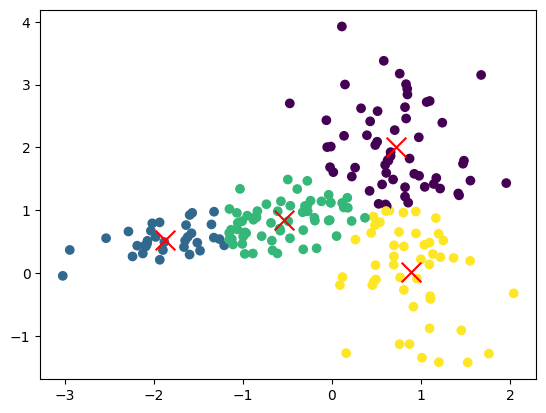

In [15]:
n = 100
clf = best_of_n(n)
clf.verbose = True
centers, labels, cost_visualization = clf.predict()


print(f"Best cost of {n} iters = {clf.cost}")
plt.scatter(Xc_2[:, 0], Xc_2[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200)

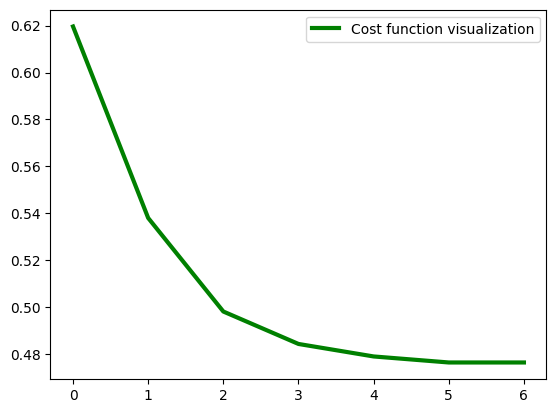

In [16]:
plt.plot(cost_visualization, c='g', linewidth=3, label="Cost function visualization")
plt.legend()